<a href="https://colab.research.google.com/github/JulverRMP/Sales-Predictions-Food/blob/main/Proyecto_1_Parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 - Parte 5

El primer proyecto será una predicción de ventas para productos alimenticios que se venden en distintas tiendas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Seguiremos trabajando en tu proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para la Parte 5, tu tarea es usar **Regresión lineal o KNN (¡o ambos!) Para crear un modelo para predecir las ventas**:

*  * A continuación, se muestran algunos recursos para utilizar cuando se trata de variables categóricas:
  * Tratamiento de características categóricas en aprendizaje automático
  * Datos categóricos
  * Aquí está todo lo que necesita saber sobre la codificación de datos categóricos (con código Python)

* La columna "Item_Outlet_Sales" es tu objetivo. Construye un modelo para predecir esto.

* Evalúa tu modelo.

* ¿Hay algo que puedas hacer para mejorar el modelo?

* ¿Qué características están más asociadas con la predicción de ventas mayores?



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [82]:
# Tenen cuenta que es probable que el nombre del archivo sea diferente en tu computadora (especialmente más adelante en el curso)
filename = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/SEMANA02/sales_predictions.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Inspección y Limpieza de la data

Se verifica si hay datos duplicados con el método duplicate

In [83]:
df.duplicated().sum()

0

* Explora los datos: ¿Qué necesitas para limpiar estos datos?





verificar los tipos de datos, si hay datos nulos, datos erroneos, datos repetidos, realizar iputaciones de acuerdo a la verificación previo.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Según el método .info, se obtiene que las columnas donde tienen datos faltantes son: 'Item_Weight' , 'Outlet_Size'

Porcentaje de valores nulos por columna

In [85]:
df.isnull().mean().sort_values(ascending=False)*100

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [86]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

¿Hay valores faltantes en el conjunto de datos? Es posible que algunas tiendas no informen de todos los datos a causa de problemas técnicos u otros problemas. De ser así, trata con ello apropiadamente.

Verificando la información se observa que faltan datos en la columna 'Outlet_Size', por lo cual se identifica a que tiendas les falta dicho dato.

In [87]:
size_missing = df['Outlet_Size'].isna()
# Mira las filas que contienen NaN para size_missing
df.loc[size_missing,'Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    929
OUT017    926
OUT010    555
Name: count, dtype: int64

Luego se observa que existe una relación entre el tipo de centro comercial, el tipo de area donde se ubica la tienda y el identificador de tienda y además las tiendas que no tienen una clasificación de tamaño son: OUT045, OUT017 y OUT010.

In [88]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier'])[['Item_Identifier']].count()

Item_Identifier
Outlet_Type       Outlet_Location_Type Outlet_Identifier                 
Grocery Store     Tier 1               OUT019                         528
                  Tier 3               OUT010                         555
Supermarket Type1 Tier 1               OUT046                         930
                                       OUT049                         930
                  Tier 2               OUT017                         926
                                       OUT035                         930
                                       OUT045                         929
                  Tier 3               OUT013                         932
Supermarket Type2 Tier 3               OUT018                         928
Supermarket Type3 Tier 3               OUT027                         935

Por lo cual se procede a realizar un agrupamiento  según todas las categorias anteriores , añadiendo la coluna 'Outlet_Size' y relizando la suma de todas las ventas de las tiendas.

In [89]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier','Outlet_Size'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier Outlet_Size                   
Grocery Store     Tier 1               OUT019            Small             1.796941e+05
Supermarket Type1 Tier 1               OUT046            Small             2.118395e+06
                                       OUT049            Medium            2.183970e+06
                  Tier 2               OUT035            Small             2.268123e+06
                  Tier 3               OUT013            High              2.142664e+06
Supermarket Type2 Tier 3               OUT018            Medium            1.851823e+06
Supermarket Type3 Tier 3               OUT027            Medium            3.453926e+06

En la tabla anterior no se muestran las tiendas que no tienen clasificación en la columna 'Outlet_Size', por lo que procede a realizar la misma agrupación pero sin considerar la columna 'Outlet_Size' para poder saber las ventas totales de cada tienda y comparar con la tabla anterior para asi poder clasificar las tiendas faltantes.

In [90]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier                   
Grocery Store     Tier 1               OUT019                  1.796941e+05
                  Tier 3               OUT010                  1.883402e+05
Supermarket Type1 Tier 1               OUT046                  2.118395e+06
                                       OUT049                  2.183970e+06
                  Tier 2               OUT017                  2.167465e+06
                                       OUT035                  2.268123e+06
                                       OUT045                  2.036725e+06
                  Tier 3               OUT013                  2.142664e+06
Supermarket Type2 Tier 3               OUT018                  1.851823e+06
Supermarket Type3 Tier 3               OUT027                  3.453926e+06

Por lo cual se puede con cluir que las tiendas faltantes de clasificar tendrian la siguiente clasificación:

Esta tienda pertenece a la categoria "Grocery Store" y su venta es mayor a la tienda OUT019 que tiene una clasificación de small, por lo cual se clasificara con Medium.
* OUT010  : Medium

Las tiendas pertenecen a la categoria Supermarket Type1, tipo de área donde se ubican (Tier 2) y además los valores de ventas son menores al de la tienda OUT035 el cual tiene una categoria de Small, por lo tanto lo cual las tiendas se clasificara con la categoria de Small.
* OUT045  :  Small

* OUT017  :  Small


In [91]:
out010_filter=df['Outlet_Identifier'] == 'OUT010'
df.loc[out010_filter, 'Outlet_Size']=df.loc[out010_filter, 'Outlet_Size'].fillna('Medium')

In [92]:
out017_filter=df['Outlet_Identifier'] == 'OUT017'
out045_filter=df['Outlet_Identifier'] == 'OUT045'
df.loc[(out017_filter | out045_filter), 'Outlet_Size']=df.loc[(out017_filter | out045_filter), 'Outlet_Size'].fillna('Small')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


S verifica las variables en la columna 'Item_Fat_Content'

In [94]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Se regulariza los valores a solo Low Fat y Regular

In [95]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Luego se agrupa la identificación de cada producto , la columna de pesos y se realia el conteo para ver cuantos producto hay que no sean repetidos


In [96]:
df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Weight']].count()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,6
DRA24,19.350,5
DRA59,8.270,6
DRB01,7.390,2
DRB13,6.115,5
...,...,...
NCZ30,6.590,6
NCZ41,19.850,5
NCZ42,10.500,5


Segun la tabla anterior se obtienen 1555 datos, sin considerar los datos de producto unico, no se repiten en otra tienda, además no tienen ingresado el peso.

Luego se realiza un conteo de valores en la columna 'Item_Identifier' donde si se consideran los productos qu no tiene ingresado el peso en la tabla de datos.

In [97]:
df['Item_Identifier'].value_counts().reset_index()

,Item_Identifier,count
0,FDW13,10
1,FDG33,10
2,NCY18,9
3,FDD38,9
4,DRE49,9
...,...,...
1554,FDY43,1
1555,FDQ60,1
1556,FDO33,1
1557,DRF48,1


Por lo tanto en la última tabla se obtienen 1559 filas, es decir 1559; pero en la tabla anterior donde se consideraban los productos con datos de peso ingresado se obtuvo 1555 productos; por lo tanto se puede llegar a la conclusión de que existen 4 productos que no fueron ingresados sus pesos en la columna 'Item_Weight' y que no existen los mismos productos en otras tiendas, es decir son productos unicos.

Se procede a hacer una lista de los productos en mención

In [98]:
lisn1=[]
for x in df['Item_Identifier'].unique():
  lisn1.append(x)
print(lisn1)

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44', 'NCR17', 'FDU04', 'FDF41', 'FDB56', 'FDT28', 'FDD10', 'FDW57', 'DRB48', 'FDP09', 'FDH14', 'FDA47', 'FDG12', 'DRE60', 'DRK49', 'FDD03', 'FDS52', 'FDW39', 'FDX34', 'FDV11', 'FDD17', 

In [99]:
id_filter=df['Item_Identifier'] == 'FDO60'
df.loc[id_filter]['Item_Weight']

1653    20.0
2897    20.0
5175    20.0
6085    20.0
6266    20.0
6277    20.0
7534     NaN
Name: Item_Weight, dtype: float64

In [100]:
id_filter=df['Item_Identifier'] == 'FDO60'
df.loc[id_filter, 'Item_Weight']

1653    20.0
2897    20.0
5175    20.0
6085    20.0
6266    20.0
6277    20.0
7534     NaN
Name: Item_Weight, dtype: float64

In [101]:
df.loc[id_filter]['Item_Weight'].max()

20.0

Luego se ingresan los datos faltantes a los productos que cuentan con un peso determinado, el cual fue ingresado en algunas tiendas, pero en otras por lo cual se encuentra vacio en la columna 'Item_Weight'.

Se realiza un barrido a la lista de productos creada, luego se filtra cada producto en el dataframe, para luego localizazr las filas con el mismo producto y si cuenta con algunas filas NaN se ingresa el valor de la otra fila que si cuente el peso para el mismo producto; pero si el producto es unico lo deja en vacio.

In [102]:
for x in lisn1:
  id_filter=df['Item_Identifier'] == x
  m=df.loc[id_filter]['Item_Weight'].max()
  df.loc[id_filter,'Item_Weight']=df.loc[id_filter]['Item_Weight'].fillna(m)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Luego de rellenar los valores faltantes según el criterio mencionado anteriorente nos quedarian solo 4 filas con valores nulos ya que estos productos son unicos.

In [105]:
tabla_nan=df[df['Item_Weight'].isna()]
tabla_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Según la tala anterior hay 4 productos que no ha sido reemplazado el valor NaN en la tabla, debido a que son productos unicos y no hay dato similar para ingresar, ademas dichos productos pertenecen a diferente tipo de artículo.

Por lo tanto se procede a rellenar los valores vacios con la media de los productos, clasificandolo según el tipo de artículo.

In [106]:
lisn2=list(tabla_nan['Item_Type'])
lisn2

['Frozen Foods', 'Snack Foods', 'Dairy', 'Baking Goods']

In [107]:
for x in lisn2:
  type_filter=df['Item_Type'] == x
  mean=df.loc[type_filter]['Item_Weight'].mean()
  df.loc[type_filter,'Item_Weight']=df.loc[type_filter]['Item_Weight'].fillna(mean)

Se verifica que no hay valores NaN en la base de datos.

In [108]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.875418,4.645016,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


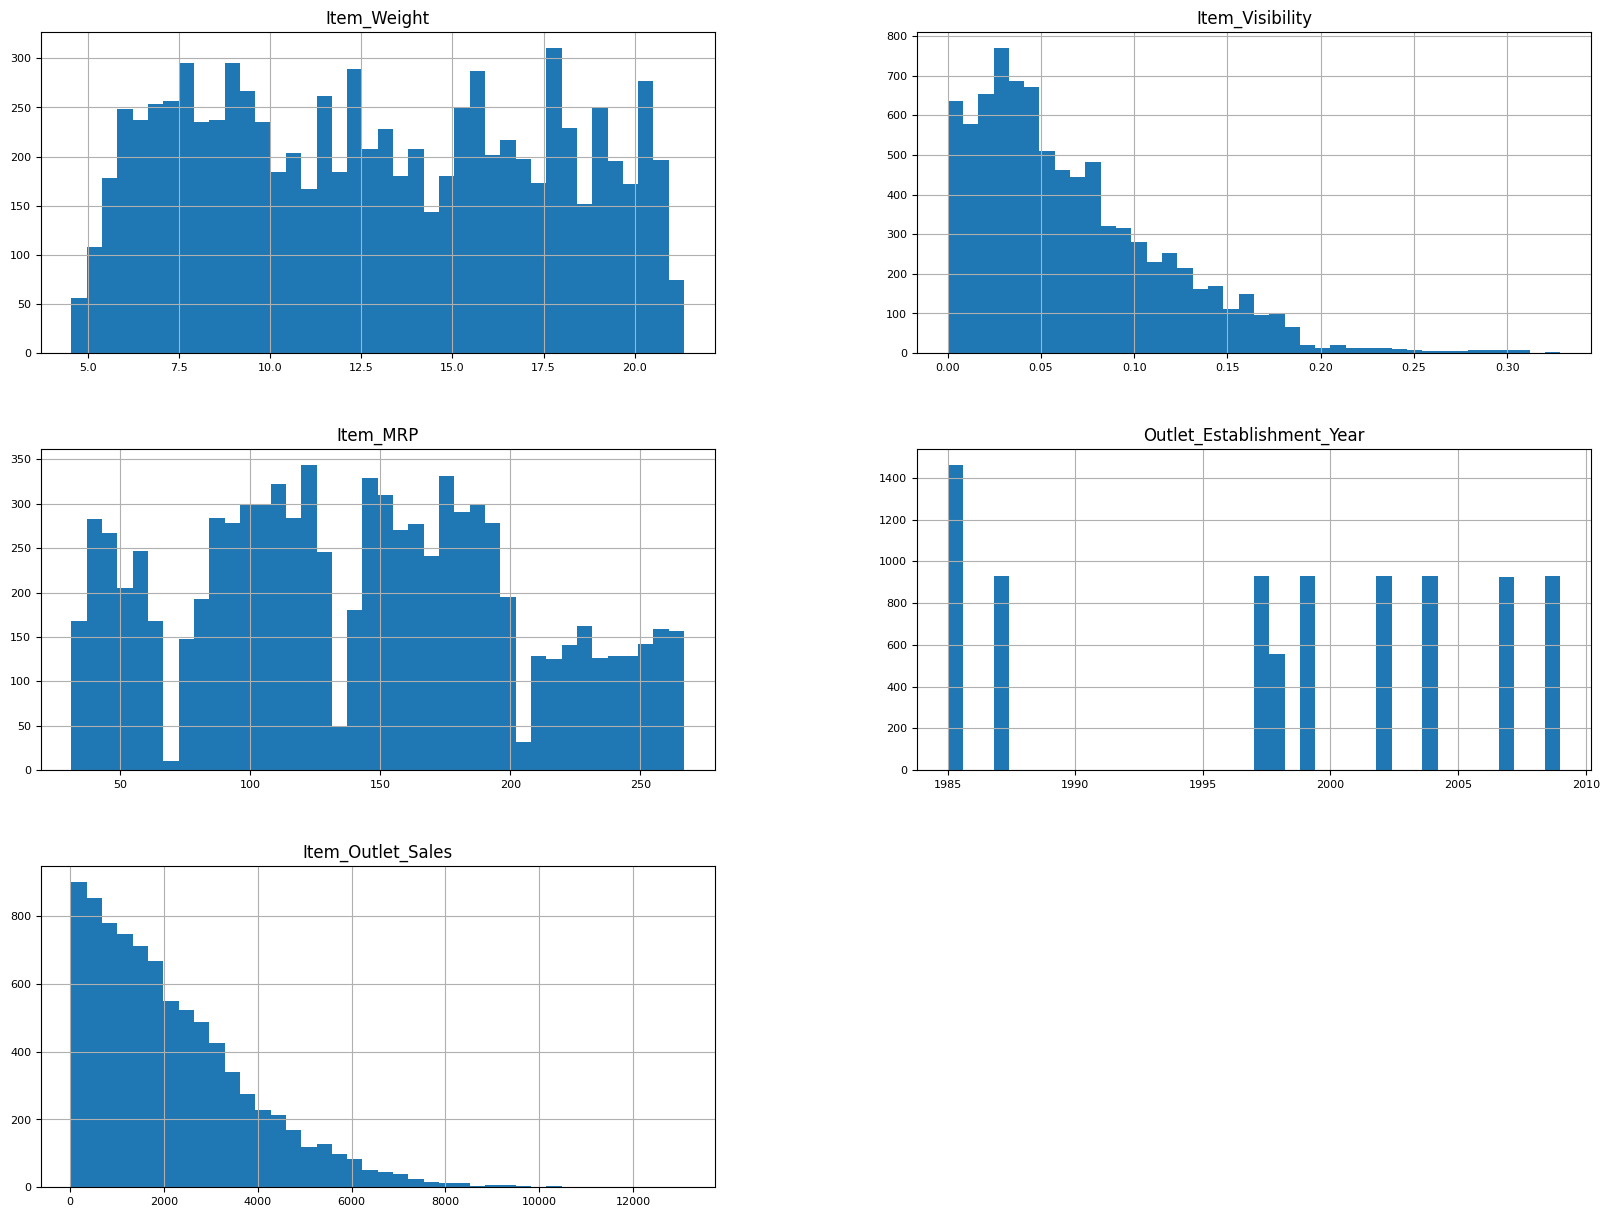

In [110]:
df.hist(bins=40, figsize=(20, 15), xlabelsize='8', ylabelsize='8')
plt.show()

Se puede observar algunas columnas con outliers que se analizaran a continuación

In [111]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [112]:
listn1 = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']

In [113]:
columns = listn1

fig = make_subplots(rows=1, cols=len(columns), subplot_titles=columns)

for i, column in enumerate(columns, start=1):
    fig.add_trace(px.box(df, y=column,points='all').data[0], row=1, col=i)

fig.update_layout(title={'text': 'Diagramas de Cajas_AJUSTE', 'x':0.5, 'font': {'size': 40}},showlegend=False)
fig.show()

In [114]:
df=df[~((df['Item_Visibility'] > 0.26) | (df['Item_Outlet_Sales'] > 10000))].reset_index(drop='index')

# EDA

# Procesamiento de Data y visualización

In [115]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [116]:
df_venta_total=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(2).sort_values(by='Item_Outlet_Sales').reset_index()
df_venta_total

,Outlet_Identifier,Item_Outlet_Sales
0,OUT019,168528.63
1,OUT010,181307.99
2,OUT018,1851822.83
3,OUT045,2036725.48
4,OUT046,2118395.17
5,OUT013,2132406.93
6,OUT017,2167465.29
7,OUT049,2183969.81
8,OUT035,2268122.94
9,OUT027,3375666.59


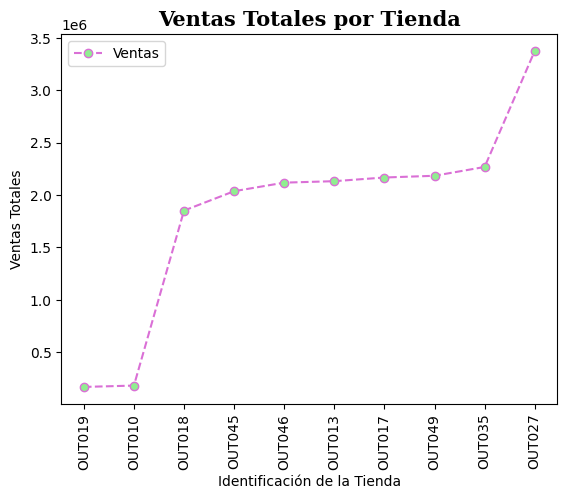

In [117]:
fig_2=plt.figure(dpi=100)
ax2=fig_2.add_subplot(1,1,1)
ax2.set_title("Ventas Totales por Tienda",ha='center', size=15, fontweight="black",fontfamily="serif")
ax2.plot(df_venta_total["Outlet_Identifier"],df_venta_total["Item_Outlet_Sales"], 'o--', color="orchid", markerfacecolor="lightgreen",label='Ventas')
ax2.set_xlabel("Identificación de la Tienda")
ax2.set_ylabel("Ventas Totales")

plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.show()

In [118]:
df_fat=df.groupby(['Item_Type','Item_Fat_Content'])['Outlet_Identifier'].count().unstack().sort_values(by='Low Fat')
df_fat

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Seafood,37.0,27.0
Breakfast,40.0,68.0
Starchy Foods,82.0,66.0
Breads,140.0,110.0
Others,169.0,NaN
Meat,170.0,252.0
Hard Drinks,213.0,NaN
Baking Goods,326.0,318.0
Canned,339.0,307.0


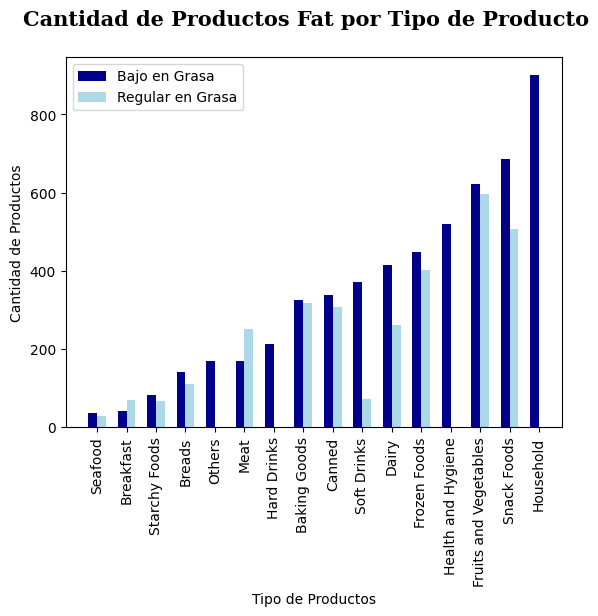

In [119]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(111)

x = df_fat.index
co=np.arange(len(x))

ya = df_fat['Low Fat'].values
yb = df_fat['Regular'].values

sep = 0.3
ax1.bar(co-sep/2, ya, sep, color='darkblue',label='Bajo en Grasa')
ax1.bar(co+sep/2, yb,sep, color='lightblue',label='Regular en Grasa')
ax1.set_xticks(co)

plt.xticks(rotation = 90)
ax1.set_xticklabels(x)

ax1.set_xlabel('Tipo de Productos')
ax1.set_ylabel('Cantidad de Productos')
plt.suptitle("Cantidad de Productos Fat por Tipo de Producto",ha='center', size=15, fontweight="black",fontfamily="serif")
plt.legend(loc='upper left')

plt.show()

In [120]:
df_max=df.groupby(['Outlet_Type','Outlet_Identifier'])['Item_Outlet_Sales'].max().reset_index()

In [121]:
df_filter=df.loc[df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].idxmax()]

In [122]:
df_mayor=df_filter[['Outlet_Type','Outlet_Identifier','Item_Type','Item_Outlet_Sales']]
df_mayor

,Outlet_Type,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7710,Grocery Store,OUT010,Household,1775.6886
6372,Supermarket Type1,OUT013,Snack Foods,9069.5276
4932,Supermarket Type1,OUT017,Dairy,9664.7528
43,Supermarket Type2,OUT018,Canned,6768.5228
8299,Grocery Store,OUT019,Health and Hygiene,1482.0708
7703,Supermarket Type3,OUT027,Frozen Foods,9678.0688
5716,Supermarket Type1,OUT035,Dairy,8479.6288
7989,Supermarket Type1,OUT045,Fruits and Vegetables,8994.9580
4266,Supermarket Type1,OUT046,Health and Hygiene,9779.9362
1497,Supermarket Type1,OUT049,Dairy,7646.0472


In [123]:
import plotly.express as px

fig = px.scatter(df_mayor, x="Outlet_Identifier", y="Item_Outlet_Sales",size="Item_Outlet_Sales", color="Item_Type",
           hover_name="Outlet_Type", size_max=75,opacity = 0.5,title="Maximas ventas de Articulos según la Tienda y el Tipo de Producto")
fig.show()

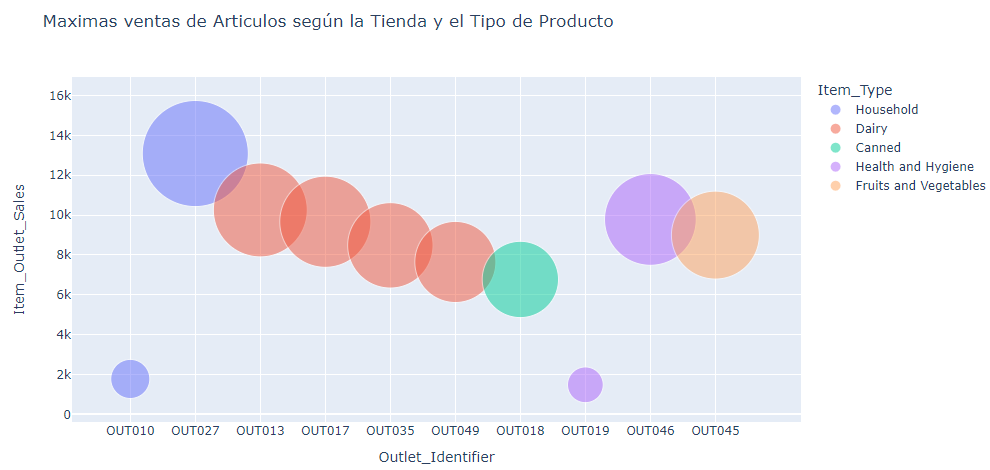

Se procede a eliminar columnas que son para identificación

In [130]:
df.drop(columns=['Item_Identifier' , 'Outlet_Identifier' ], inplace=True)

In [153]:
df1 = df.copy()

Se identifica los tipos de datos categoricos para poder realizar la conversión a Númericos

*Variables Categoricas del tipo Nominal*

In [67]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1220
Snack Foods              1194
Household                 901
Frozen Foods              851
Dairy                     677
Canned                    646
Baking Goods              644
Health and Hygiene        520
Soft Drinks               442
Meat                      422
Breads                    250
Hard Drinks               213
Others                    169
Starchy Foods             148
Breakfast                 108
Seafood                    64
Name: count, dtype: int64

*Variables Categoricas del tipo Ordinal*

In [65]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5482
Regular    2987
Name: count, dtype: int64

In [69]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4216
Medium    3322
High       931
Name: count, dtype: int64

In [70]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3323
Tier 2    2785
Tier 1    2361
Name: count, dtype: int64

In [72]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5576
Grocery Store        1037
Supermarket Type2     928
Supermarket Type3     928
Name: count, dtype: int64

In [135]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [154]:
dict_IT ={'Dairy':16, 'Soft Drinks':15, 'Meat':14, 'Fruits and Vegetables':13,'Household':12, 'Baking Goods':11, 'Snack Foods':10, 'Frozen Foods':9,'Breakfast':8, 'Health and Hygiene':7, 'Hard Drinks':6, 'Canned':5,'Breads':4, 'Starchy Foods':3, 'Others':2, 'Seafood':1}
dict_IF = {'Regular':2, 'Low Fat':1}
dict_OS = {'High':3, 'Medium':2,'Small':1}
dict_OLT = {'Tier 3':3, 'Tier 2':2, 'Tier 1':1}
dict_OT = {'Supermarket Type3':4,'Supermarket Type2':3,'Supermarket Type1':2, 'Grocery Store':1}
df1['Outlet_Type' ].replace(dict_OT, inplace=True)
df1['Item_Type'].replace(dict_IT, inplace=True)
df1['Item_Fat_Content'].replace(dict_IF, inplace=True)
df1['Outlet_Size'].replace(dict_OS, inplace=True)
df1['Outlet_Location_Type' ].replace(dict_OLT, inplace=True)

Matriz de correlación ordenado por la columna 'Item_Outlet_Sales'

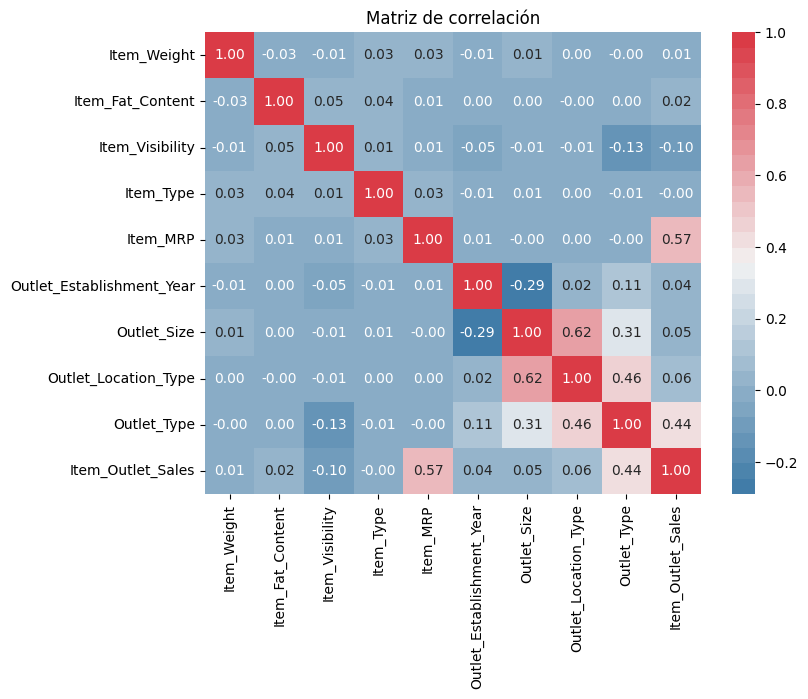

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(method='spearman'), annot=True, cmap = sns.diverging_palette(240, 10, n=30), fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Columna con baja correlación con la columna 'Item_Outlet_Sales'

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8469 non-null   float64
 1   Item_Fat_Content           8469 non-null   int64  
 2   Item_Visibility            8469 non-null   float64
 3   Item_Type                  8469 non-null   int64  
 4   Item_MRP                   8469 non-null   float64
 5   Outlet_Establishment_Year  8469 non-null   int64  
 6   Outlet_Size                8469 non-null   int64  
 7   Outlet_Location_Type       8469 non-null   int64  
 8   Outlet_Type                8469 non-null   int64  
 9   Item_Outlet_Sales          8469 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 661.8 KB


In [157]:
df=df.drop(columns=['Item_Type','Item_Fat_Content', 'Item_Weight','Outlet_Establishment_Year'])

# MODELAMIENTO ML

In [160]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import set_config
set_config(display='diagram')

In [161]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# PREPROCESAMIENTO

Se codificará las variables ordinales.

In [166]:
dict_OS = {'High':3, 'Medium':2,'Small':1}
dict_OLT = {'Tier 3':3, 'Tier 2':2, 'Tier 1':1}
dict_OT = {'Supermarket Type3':4,'Supermarket Type2':3,'Supermarket Type1':2, 'Grocery Store':1}
df['Outlet_Type' ].replace(dict_OT, inplace=True)
df['Outlet_Size'].replace(dict_OS, inplace=True)
df['Outlet_Location_Type' ].replace(dict_OLT, inplace=True)

In [169]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

Train test split para el modelo de validación

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

Instanciar selector de columna

In [171]:
# Selectors
num_selector = make_column_selector(dtype_include='number')

Instanciar transformadores

In [172]:
# Imputer
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()

Instanciar piping

In [173]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

Instanciar ColumnTransformer

In [174]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)


In [175]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x790b0190bc70>)])

Transformador de datos

In [176]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x790b0190bc70>)])

In [177]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Regresión lineal

In [178]:
# Hacer una instancia del modelo
lin_reg = LinearRegression()
# Entrenar el modelo en los datos
lin_reg .fit(X_train, y_train)
# Predecir las etiquetas de los datos nuevos
y_pred_reg = lin_reg.predict(X_test)

Evaluar el rendimiento del modelo

In [179]:
# calculen la exactitud de la clasificación
train_score_reg = lin_reg.score(X_train, y_train)
test_score_reg = lin_reg.score(X_test, y_test)
print(f'Métrica de Entrenamiento',train_score_reg)
print(f'Métrica de Prueba',test_score_reg)

Métrica de Entrenamiento 0.497223352999004
Métrica de Prueba 0.49536094402756314


Evaluar la predicción

In [180]:
r2 = r2_score(y_test, y_pred_reg)
mae=mean_absolute_error(y_test, y_pred_reg)
mse=mean_squared_error(y_test, y_pred_reg)
rmse=mean_squared_error(y_test, y_pred_reg, squared=False)
print(f"El R^2 es: {r2}")
print(f"El MAE es: {mae}")
print(f"El MSE es: {mse}")
print(f"El RMSE es: {rmse}")

El R^2 es: 0.49536094402756314
El MAE es: 919.4176615433361
El MSE es: 1468591.18251595
El RMSE es: 1211.8544394917856


# KNN

In [181]:
# Hacer una instancia del modelo
knn_regressor = KNeighborsRegressor(n_neighbors=5)
# Entrenar el modelo en los datos
knn_regressor.fit(X_train, y_train)
# Predecir las etiquetas de los datos nuevos
y_pred_knn = knn_regressor.predict(X_test)

Evaluar el rendimiento del modelo

In [182]:
# calculen la exactitud de la clasificación
train_score_knn = knn_regressor.score(X_train, y_train)
test_score_knn = knn_regressor.score(X_test, y_test)
print(f'Métrica de Entrenamiento',train_score_knn)
print(f'Métrica de Prueba',test_score_knn)

Métrica de Entrenamiento 0.6838441743482602
Métrica de Prueba 0.5212990596410281


Evaluar la predicción

In [183]:
r2 = r2_score(y_test, y_pred_knn)
mae=mean_absolute_error(y_test, y_pred_knn)
mse=mean_squared_error(y_test, y_pred_knn)
rmse=mean_squared_error(y_test, y_pred_knn, squared=False)
print(f"El R^2 es: {r2}")
print(f"El MAE es: {mae}")
print(f"El MSE es: {mse}")
print(f"El RMSE es: {rmse}")

El R^2 es: 0.5212990596410281
El MAE es: 836.5442396851633
El MSE es: 1393106.5615176607
El RMSE es: 1180.2993525024322


¿Hay algo que puedas hacer para mejorar el modelo?

Si, se puede mejorar cambiando los hyperparametros de los modelos, balanceando los datos y cambiando el metodo de imputación que se realizo a los datos faltantes.

¿Qué características están más asociadas con la predicción de ventas mayores?

Según la matriz de correlación, las caracteristicas con una fuerte relación con la variable objetivo son: el precio minorista máximo, el tipo de supermercado y el porcentaje de área de exhibición.

In [186]:
# Calcular la correlación entre las características y el objetivo (ventas)
correlation = df.corr()['Item_Outlet_Sales']
# Ordenar las características por su correlación con las ventas
sorted_correlation = correlation.abs().sort_values(ascending=False)
# Mostrar las características más correlacionadas con las ventas
print(sorted_correlation)

Item_Outlet_Sales       1.000000
Item_MRP                0.569883
Outlet_Type             0.392860
Item_Visibility         0.107945
Outlet_Location_Type    0.083868
Outlet_Size             0.056290
Name: Item_Outlet_Sales, dtype: float64
